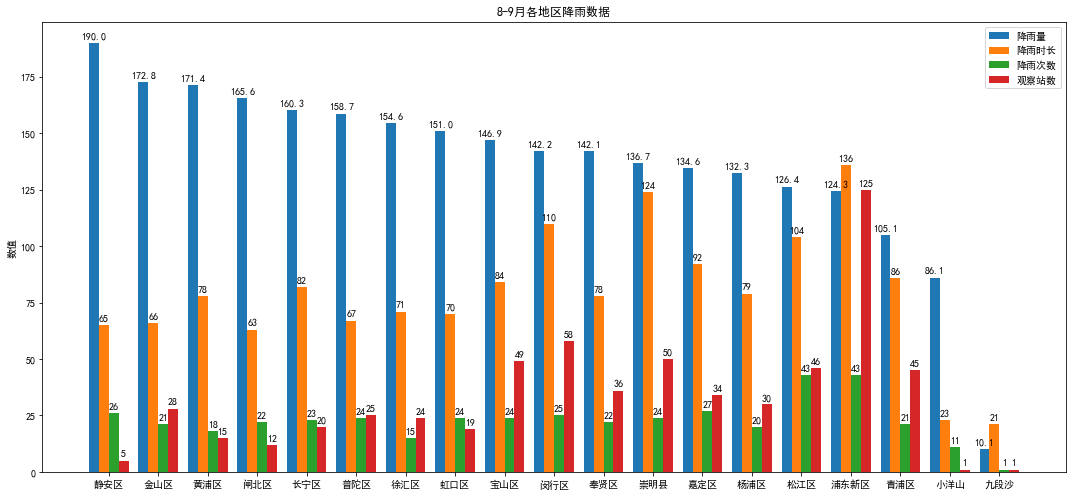

In [1]:
# -*- coding:utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号


# 降雨数据，包括地区和降雨量
observe_abute = pd.read_csv('E:/PyProject/OverpassWater/data/observe_abute.csv',encoding='gbk')
# 地区降雨数据，按照地区，时间排序
region_rain = pd.read_csv('E:/PyProject/OverpassWater/data/region_rain.csv',encoding='gbk')

'''任务一：绘制地区--降雨量    地区--降雨时长   地区--降雨次数  地区--观察点数量'''

rain_data_dra = observe_abute[['S_DIST','RAINFALL']].copy()
rain_data_dra.dropna(inplace=True)
# 地区为索引，构建雨量表
rain_data_dra = rain_data_dra.groupby('S_DIST').mean()
# 地区为索引，构建降雨时长和次数表
region_rain_dra = region_rain[['S_DIST', 'DURATION']]
region_rain_dra = region_rain_dra.groupby('S_DIST').sum()
region_rain_dra['EREQ'] = np.nan
# 地区为索引，构建观察点数量表
di_ob_dra = region_rain[['S_DIST', 'DI_OB']]
di_ob_dra = di_ob_dra.groupby('S_DIST').mean()

ra_ob_dra = region_rain[['S_DIST', 'RA_OB']]
ra_ob_dra = ra_ob_dra.groupby('S_DIST').mean()

for s_dict in region_rain_dra.index:
    region_rain_dra.loc[s_dict, 'EREQ'] = region_rain[region_rain['S_DIST'] == s_dict]['DURATION'].count()

# 将上述两份数据按照索引进行合并
draw_data = pd.concat([rain_data_dra,region_rain_dra,di_ob_dra,ra_ob_dra],axis = 1)
draw_data.sort_values('RAINFALL', inplace=True,ascending=False)
# 排除“无”与其他地区信息 的数据
out_region = ['无', '江苏省', '浙江省']
out = []
for i in draw_data.index:
    if i in out_region: out.append(False)
    else: out.append(True)

draw_data = draw_data[out]

labels = list(draw_data.index)
RAINFALL = draw_data['RAINFALL'].round(1)
DURATION = draw_data['DURATION'].astype(int)
EREQ = draw_data['EREQ'].astype(int)
DI_OB = draw_data['DI_OB'].astype(int)
RA_OB = draw_data['RA_OB'].astype(int)

x = np.arange(len(labels))
width = 0.2
fig, ax = plt.subplots(figsize=(15,7))
rects1 = ax.bar(x - 0.3, RAINFALL, width, label='降雨量')
rects2 = ax.bar(x - 0.1 , DURATION, width, label='降雨时长')
rects3 = ax.bar(x + 0.1, EREQ, width, label='降雨次数')
rects4 = ax.bar(x + 0.3, RA_OB, width, label='观察站数')

ax.set_ylabel('数值')
ax.set_title('8-9月各地区降雨数据')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom') 

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.savefig('E:/PyProject/OverpassWater/data/降雨图.png')

plt.show()

In [2]:
'''任务二：各地区积水点个数，积水次数'''

# 积水数据，包括下立交点和积水深度
overpass_abute = pd.read_csv('E:/PyProject/OverpassWater/data/overpass_abute.csv',encoding='gbk')

overpass_data = overpass_abute[['S_NO', 'S_ADDR', 'MEAN_DEEP', 'MAX_DEEP', 'FREQU', 'S_DIST']]
overpass_data = overpass_data[overpass_data['FREQU'] >= 1].copy(deep=True)
value = {'S_DIST':'无'}
overpass_data.fillna(value=value, inplace=True)

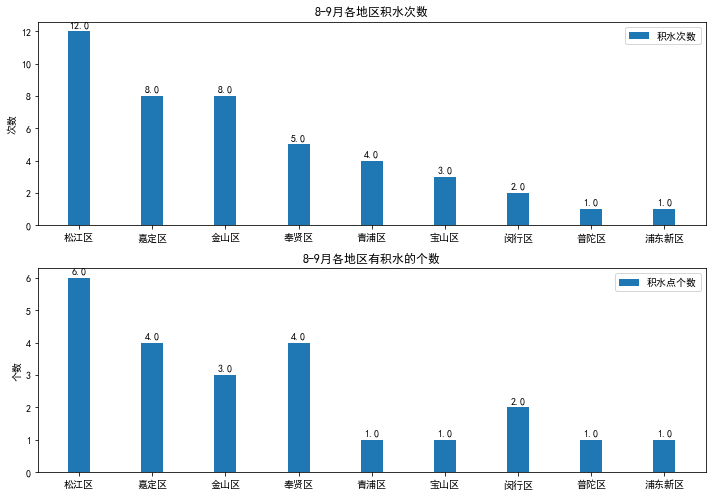

In [3]:
# 地区统计，下立交积水次数
overpass_region = overpass_data.groupby('S_DIST').sum()
# 地区统计，下立交个数
overpass_region['NUMS'] = np.nan
for s_dict in overpass_region.index:
    overpass_region.loc[s_dict, 'NUMS'] = list(overpass_data['S_DIST']).count(s_dict)

overpass_region.sort_values('FREQU', inplace=True,ascending=False)
# 排除“无”地区信息 的数据
overpass_region = overpass_region[overpass_region.index != '无']

labels = list(overpass_region.index)
FREQU = overpass_region['FREQU'].round(1)
NUMS = overpass_region['NUMS'].round(1)

x = np.arange(len(labels))
width = 0.3
fig, ax = plt.subplots(2, 1, figsize=(10,7))
rects1 = ax[0].bar(x, FREQU, width, label='积水次数')
rects2 = ax[1].bar(x, NUMS, width, label='积水点个数')

ax[0].set_ylabel('次数')
ax[0].set_title('8-9月各地区积水次数')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].legend()

ax[1].set_ylabel('个数')
ax[1].set_title('8-9月各地区有积水的个数')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].legend()

def autolabel1(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax[0].annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom') 
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax[1].annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom') 
        
autolabel1(rects1)
autolabel2(rects2)
fig.tight_layout()

plt.savefig('E:/PyProject/OverpassWater/data/积水图.png')

plt.show()

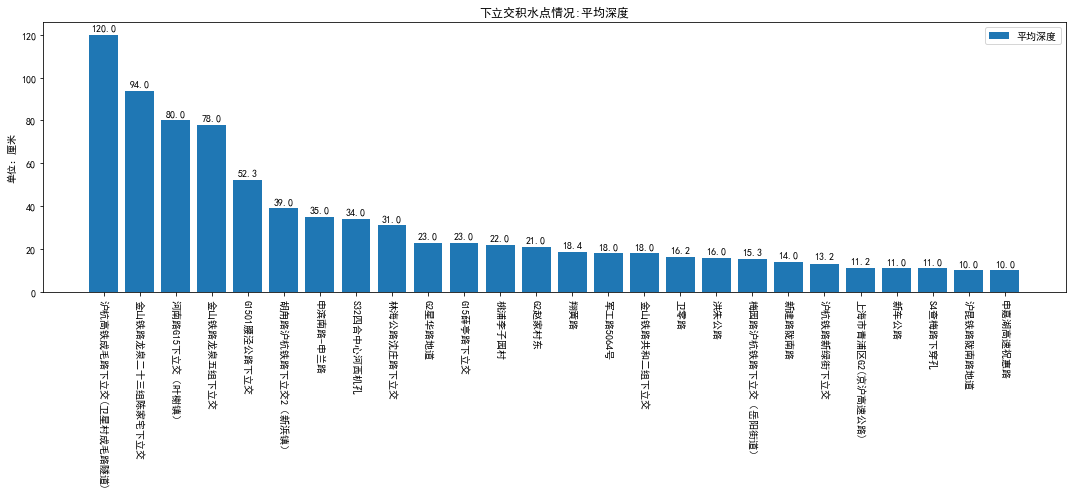

In [4]:
'''任务三：各积水点积水情况'''

overpass_local = overpass_data.set_index('S_ADDR')
overpass_local_mean = overpass_local.sort_values('MEAN_DEEP', ascending=False)
labels = list(overpass_local_mean.index)
MEAN_DEEP = overpass_local_mean['MEAN_DEEP'].round(1)

x = np.arange(len(labels))
width = 0.8
fig, ax = plt.subplots(figsize=(15,7))
rects1 = ax.bar(x, MEAN_DEEP, width, label='平均深度')

ax.set_ylabel('单位：厘米')
ax.set_title('下立交积水点情况:平均深度')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=-90)
ax.legend()

autolabel(rects1)
fig.tight_layout()

plt.rcParams['savefig.dpi'] = 800 #图片像素
plt.rcParams['figure.dpi'] = 300 

plt.savefig('E:/PyProject/OverpassWater/data/下立交平均深度.png', dpi = 800)
plt.show()

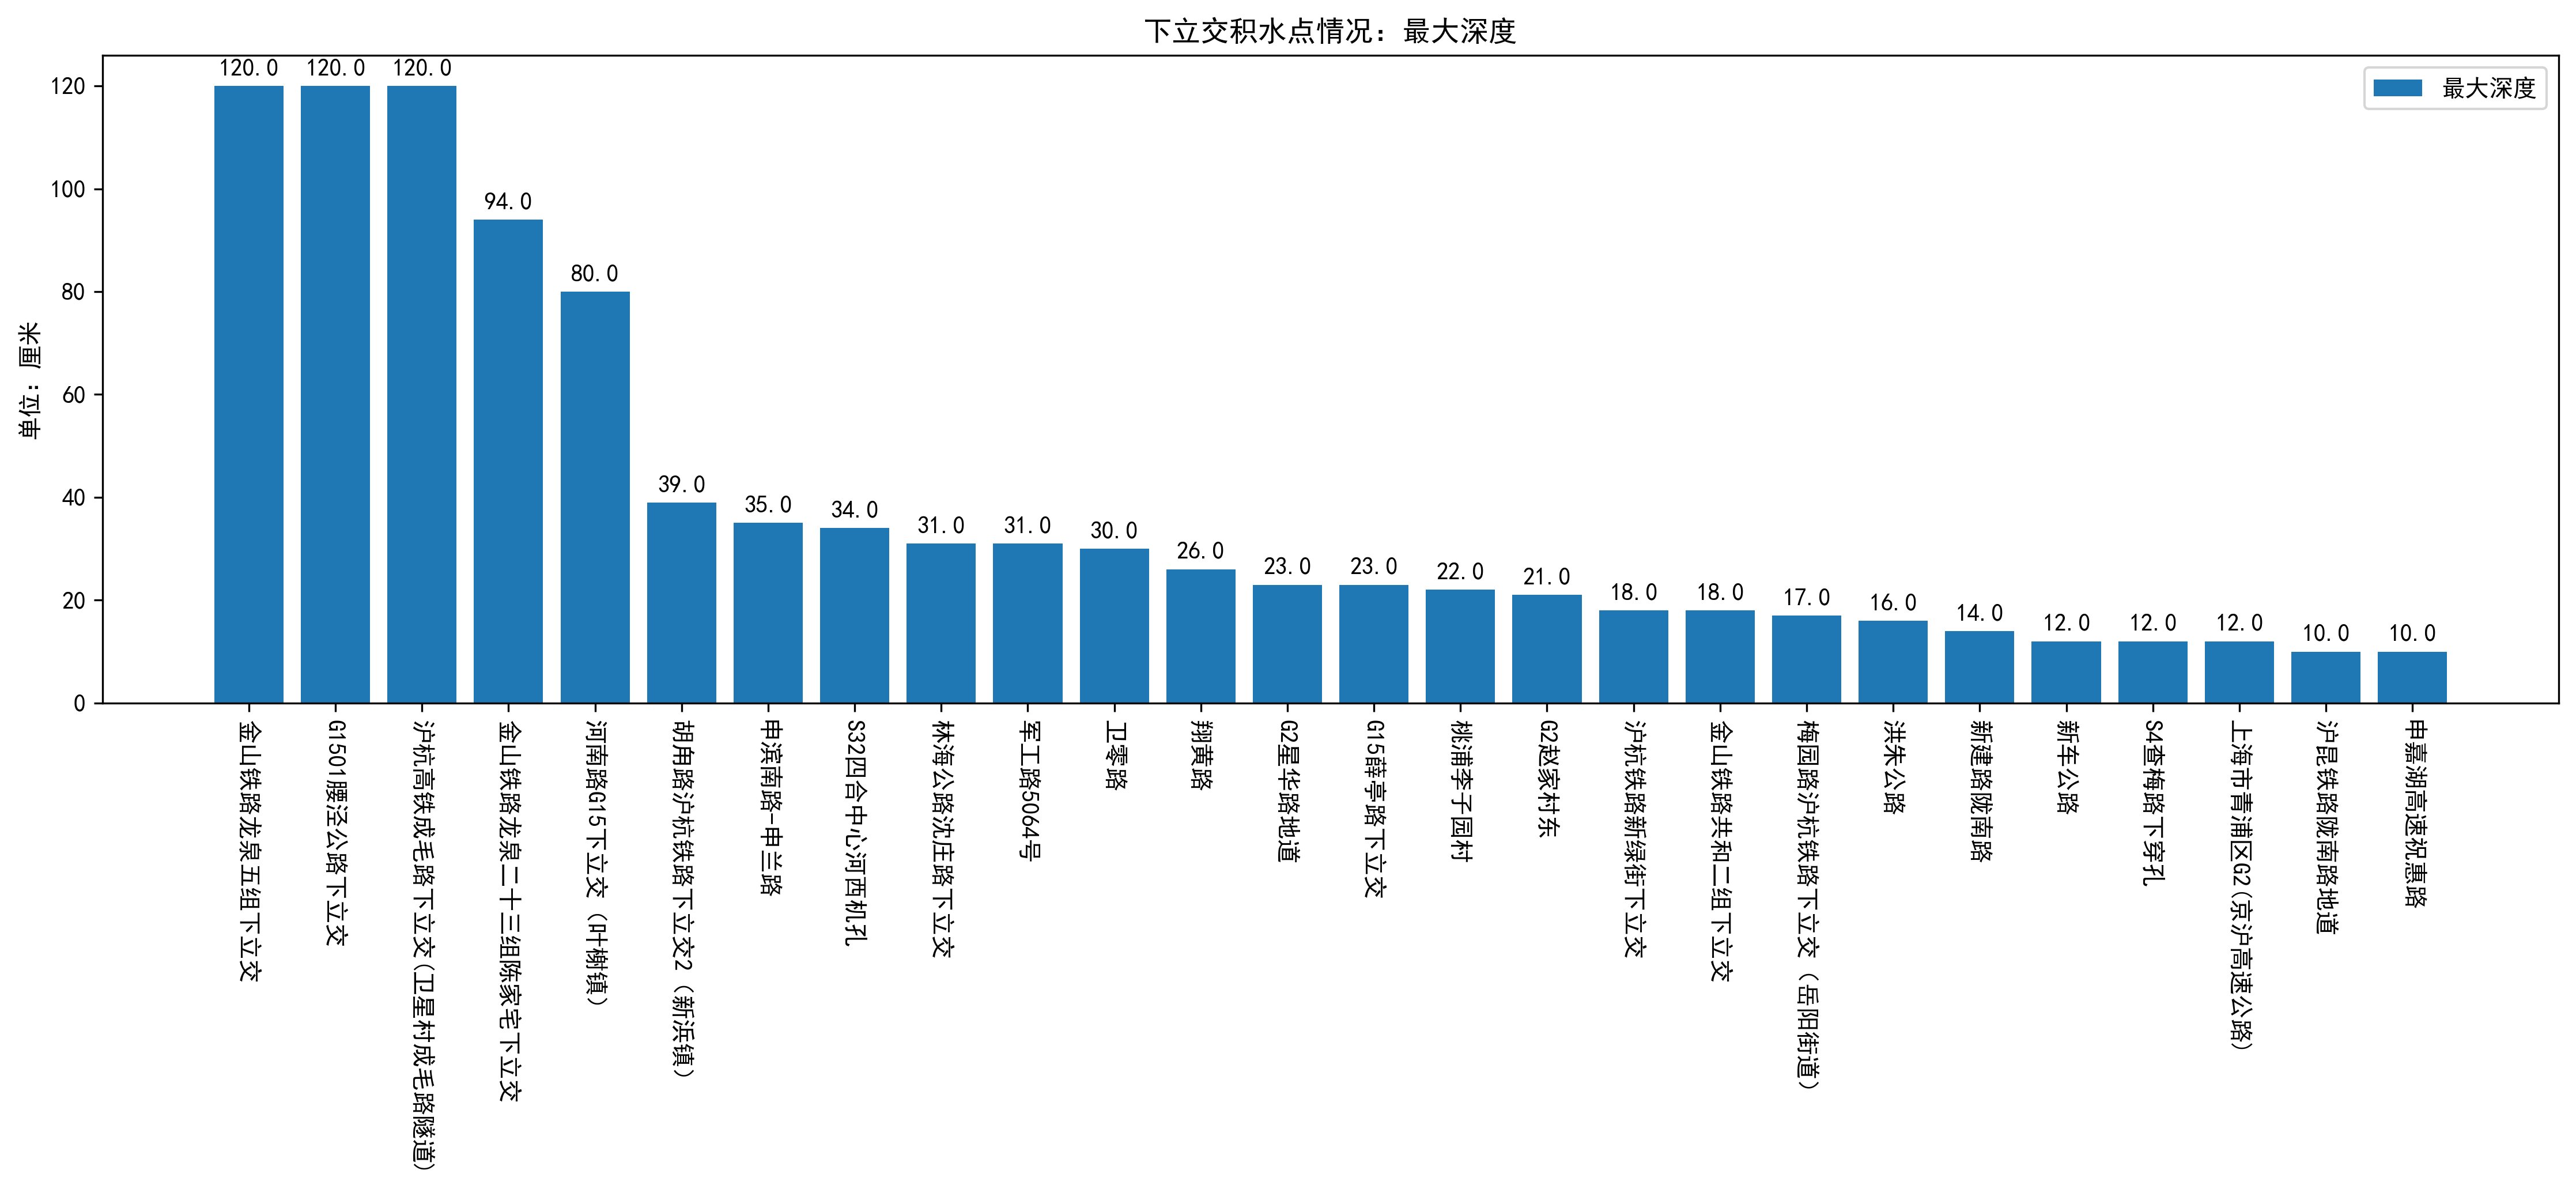

In [5]:
overpass_local_max = overpass_local.sort_values('MAX_DEEP', ascending=False)
MAX_DEEP = overpass_local_max['MAX_DEEP'].round(1)
labels = list(overpass_local_max.index)

x = np.arange(len(labels))
width = 0.8
fig, ax = plt.subplots(figsize=(15,7))
rects2 = ax.bar(x , MAX_DEEP, width, label='最大深度')

ax.set_ylabel('单位：厘米')
ax.set_title('下立交积水点情况：最大深度')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=-90)
ax.legend()

autolabel(rects2)
fig.tight_layout()

plt.rcParams['savefig.dpi'] = 800 #图片像素
plt.rcParams['figure.dpi'] = 300 

plt.savefig('E:/PyProject/OverpassWater/data/下立交最大深度.png', dpi = 800)
plt.show()

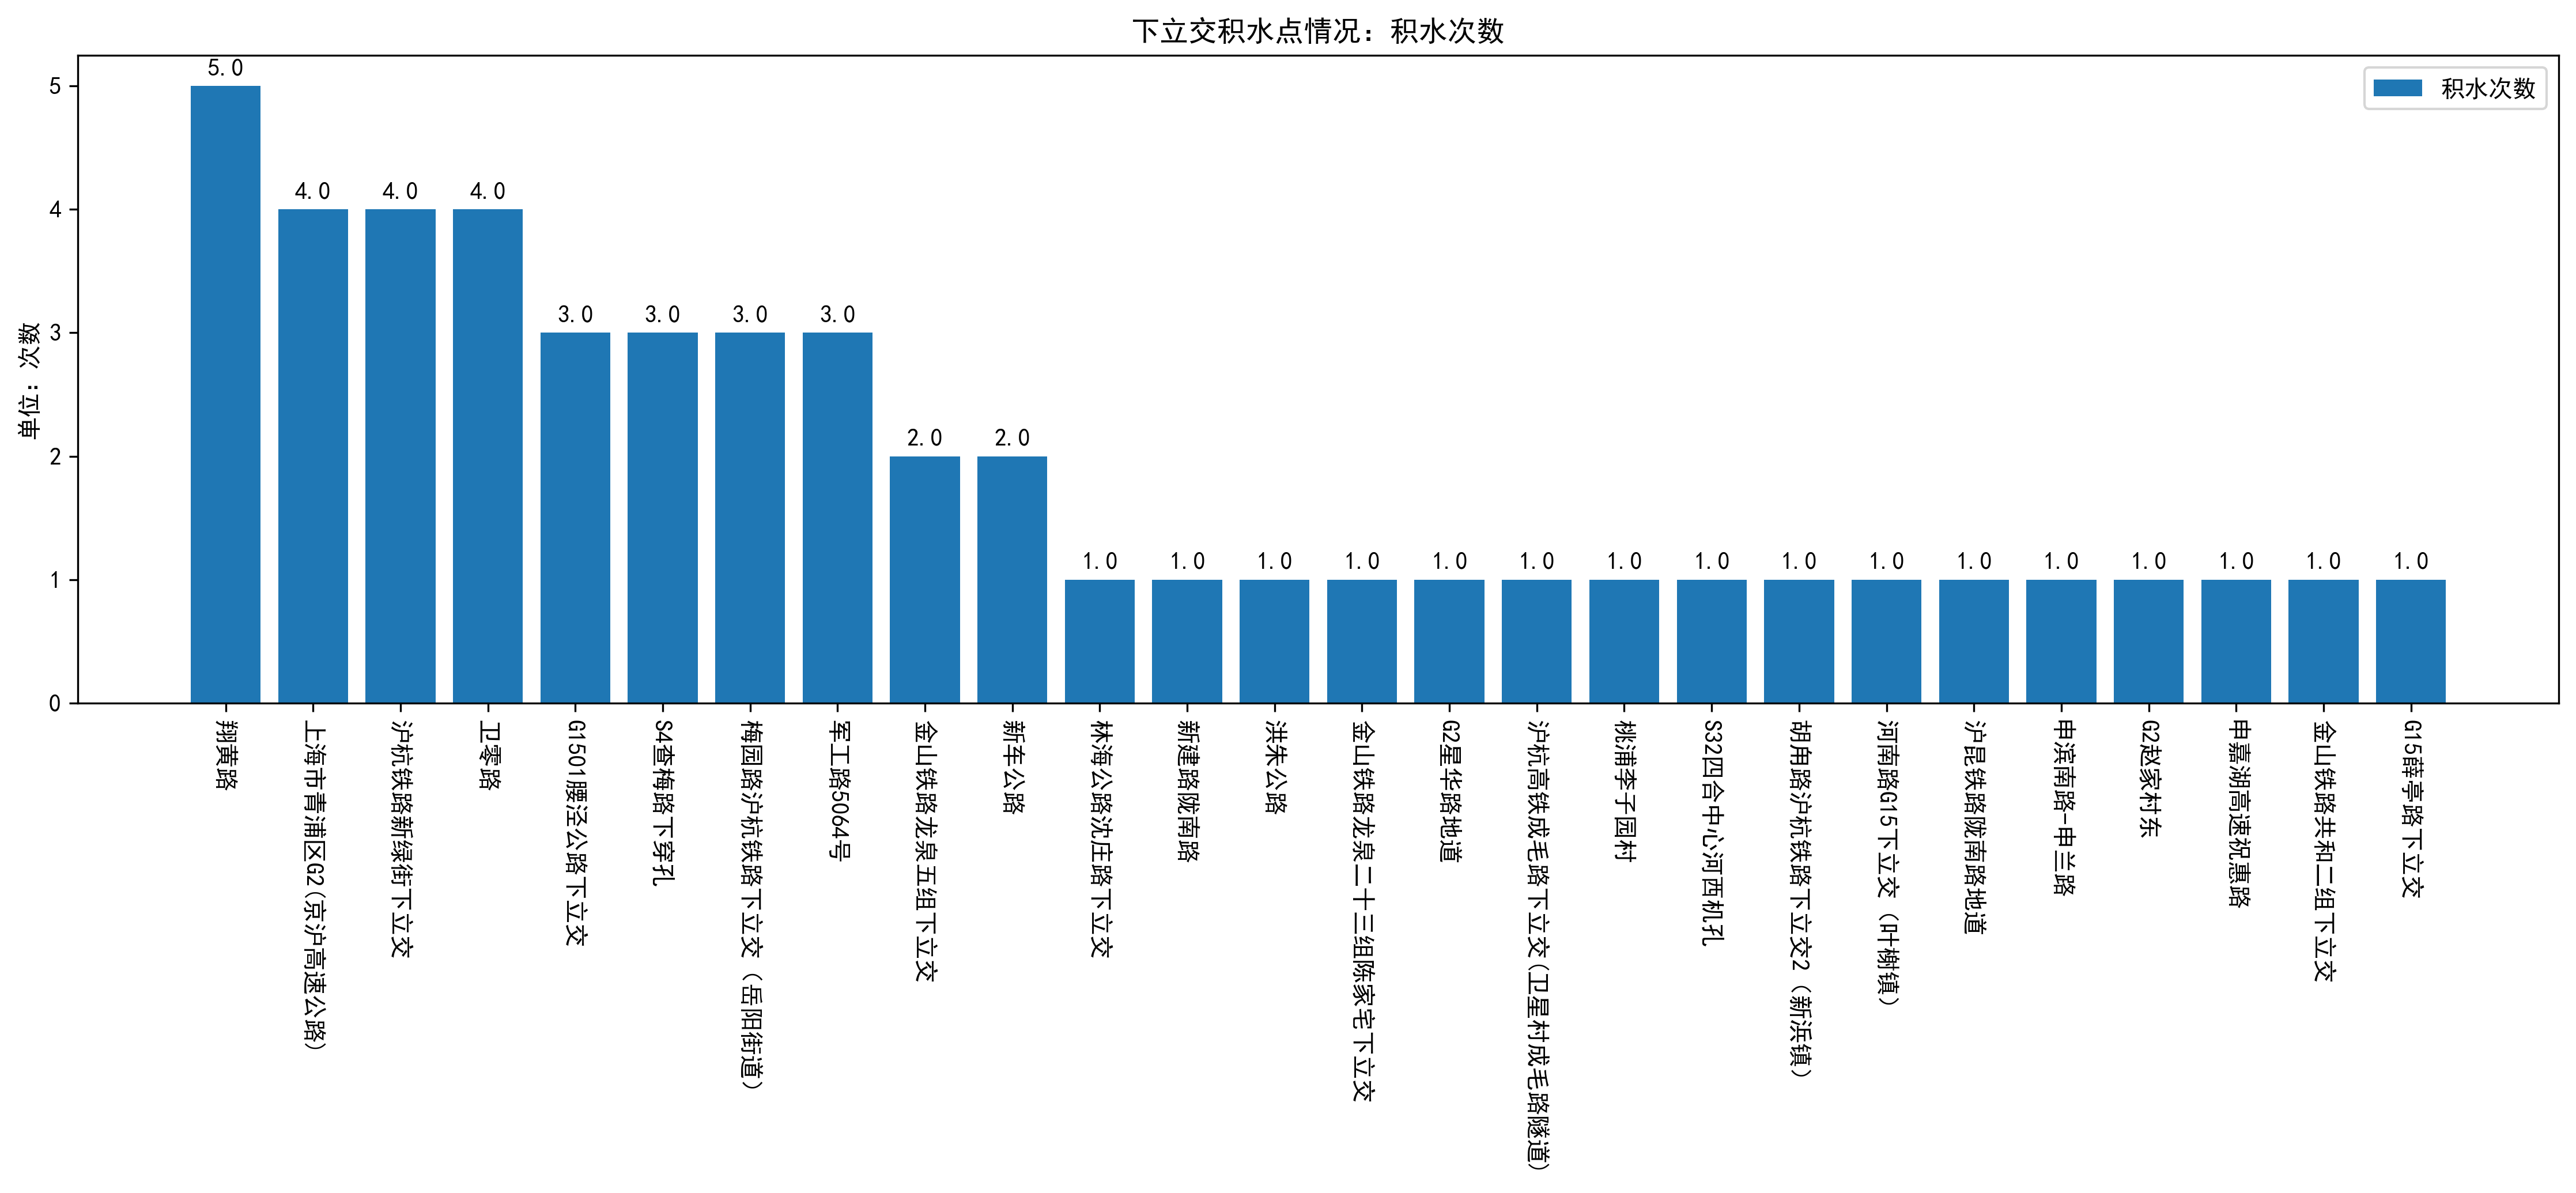

In [6]:
overpass_local_freq = overpass_local.sort_values('FREQU', ascending=False)
FREQU = overpass_local_freq['FREQU'].round(1)
labels = list(overpass_local_freq.index)

x = np.arange(len(labels))
width = 0.8
fig, ax = plt.subplots(figsize=(15,7))
rects3 = ax.bar(x, FREQU, width, label='积水次数')

ax.set_ylabel('单位：次数')
ax.set_title('下立交积水点情况：积水次数')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=-90)
ax.legend()

autolabel(rects3)
fig.tight_layout()

plt.rcParams['savefig.dpi'] = 800 #图片像素
plt.rcParams['figure.dpi'] = 300 

plt.savefig('E:/PyProject/OverpassWater/data/下立交积水次数.png', dpi = 800)
plt.show()

In [7]:
# overpass_data 下立交基础数据，取其中S_NO与S_ADDR的对应关系
overpass_data_tmp = overpass_data.set_index('S_NO')
# hydrops_data 下立交积水数据，有积水时间，深度与等级
hydrops_data = pd.read_csv('E:\PyProject\OverpassWater\data\hydrops_data.csv', encoding='gbk')
index = 0

# 整合数据hydrops_rank：S_NO，S_ADDR，LEVEL_ONE，LEVEL_TWO，LEVEL_THR，LEVEL_FOR
hydrops_rank = pd.DataFrame(columns=['S_NO','S_ADDR', 'FREQ', 'LEVEL_ONE','LEVEL_TWO','LEVEL_THR','LEVEL_FOR'])

# 获取hydrops_data下立交积水的S_NO，进行匹配
hydrops = set(hydrops_data['S_NO'])
for s_no in hydrops:
    s_addr = overpass_data_tmp.loc[s_no, 'S_ADDR']
    level_one, level_two, level_thr, level_for = 0, 0, 0, 0
    for rank_data in hydrops_data[hydrops_data['S_NO'] == s_no]['RANK']:
        if rank_data == 1: level_one += 1
        elif rank_data == 2: level_two += 1
        elif rank_data == 3: level_thr += 1
        elif rank_data == 4: level_for += 1
    freq = sum([level_one, level_two, level_thr, level_for])
    hydrops_rank.loc[index] = [s_no,s_addr, freq, level_one, level_two, level_thr, level_for]
    index += 1

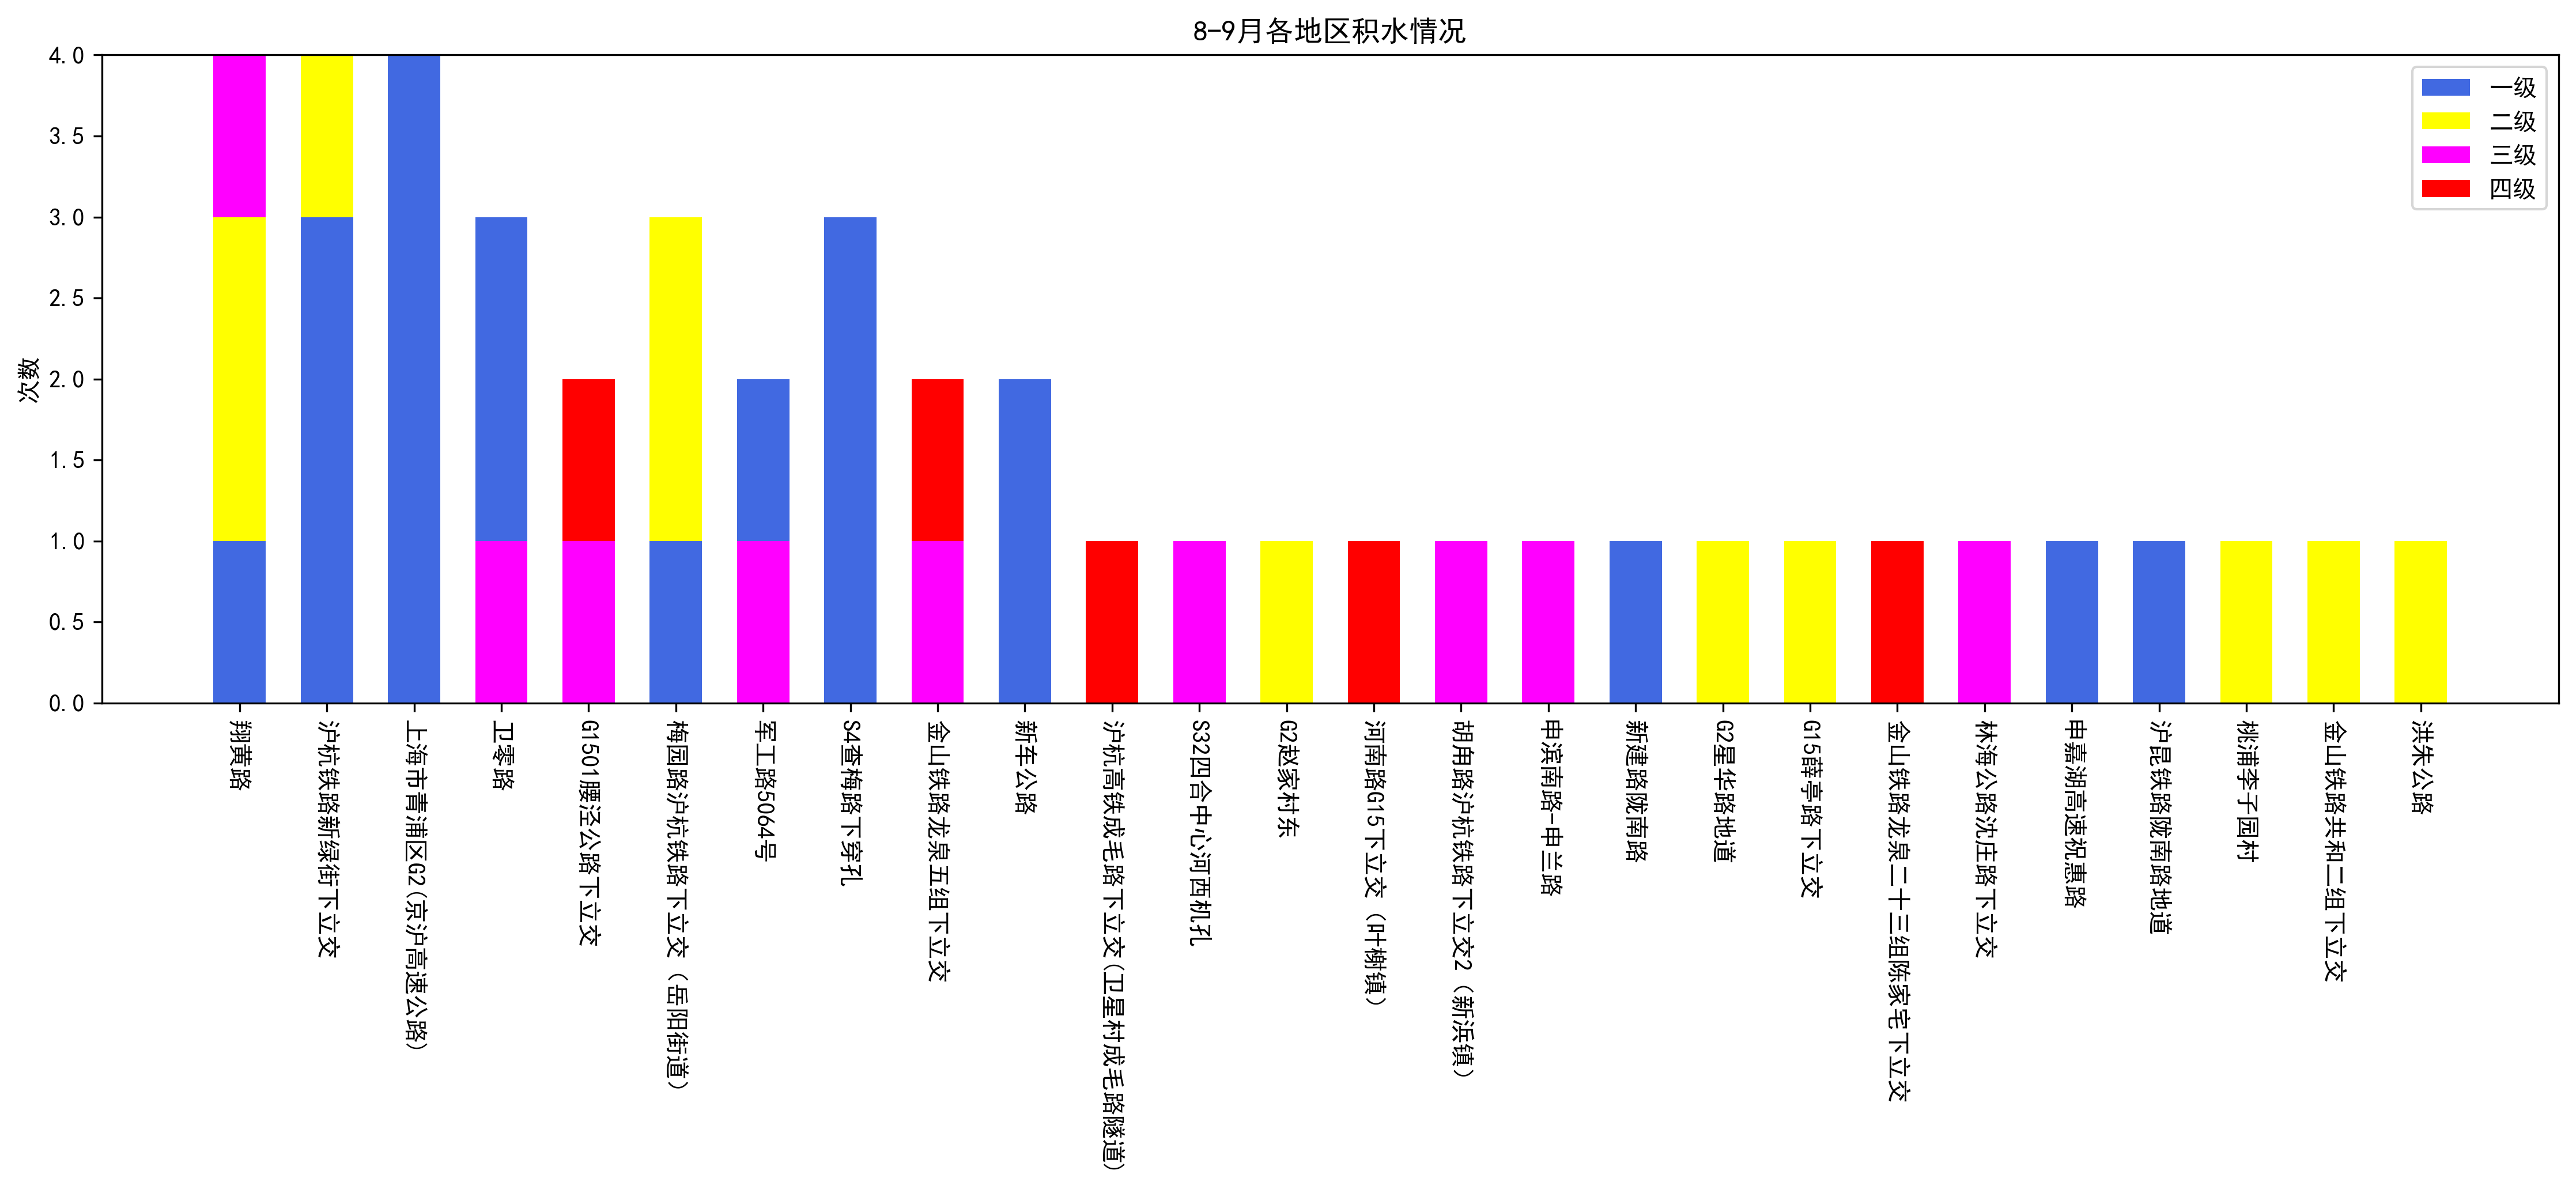

In [8]:
'''绘制地区各积水点的积水等级次数'''

hydrops_rank_tmp = hydrops_rank.sort_values('FREQ', ascending=False)

labels = list(hydrops_rank_tmp['S_ADDR'])
LEVEL_ONE = hydrops_rank_tmp['LEVEL_ONE'].astype(int)
LEVEL_TWO = hydrops_rank_tmp['LEVEL_TWO'].astype(int)
LEVEL_THR = hydrops_rank_tmp['LEVEL_THR'].astype(int)
LEVEL_FOR = hydrops_rank_tmp['LEVEL_FOR'].astype(int)

x = np.arange(len(labels))
width = 0.6
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(x, LEVEL_ONE, width, label='一级', color='royalblue')
ax.bar(x, LEVEL_TWO, width, bottom=LEVEL_ONE, label='二级', color='yellow')
ax.bar(x, LEVEL_THR, width, bottom=LEVEL_TWO, label='三级', color='fuchsia')
ax.bar(x, LEVEL_FOR, width, bottom=LEVEL_THR, label='四级', color='red')

ax.set_ylabel('次数')
ax.set_title('8-9月各地区积水情况')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=-90)
ax.legend()

fig.tight_layout()
plt.savefig('E:/PyProject/OverpassWater/data/积水等级图.png')
plt.show()

In [58]:
# observe_abute 降雨观察点属性表
# overpass_abute 下立交点属性表
'''绘制任务：下立交点地址，降雨量，积水次数'''
overpass_abute_copy = overpass_abute.copy(deep=True)
overpass_abute_copy['RAINFALL'] = ''

for row in overpass_abute_copy.itertuples(index=True):
    rainfall = observe_abute[observe_abute['S_STATIONID'] == row.S_STATIONID]['RAINFALL']
    if len(rainfall.values) == 0:
        overpass_abute_copy.loc[row.Index, 'RAINFALL'] = np.nan
    else:
        overpass_abute_copy.loc[row.Index, 'RAINFALL'] = rainfall.values

overpass_abute_copy['FREQU'] = overpass_abute_copy['FREQU'].fillna(0)

# draw_data = overpass_abute_copy.sort_values('RAINFALL', ascending=False)
draw_data = overpass_abute_copy.sort_values('FREQU', ascending=False)
draw_data = draw_data.iloc[0:15]

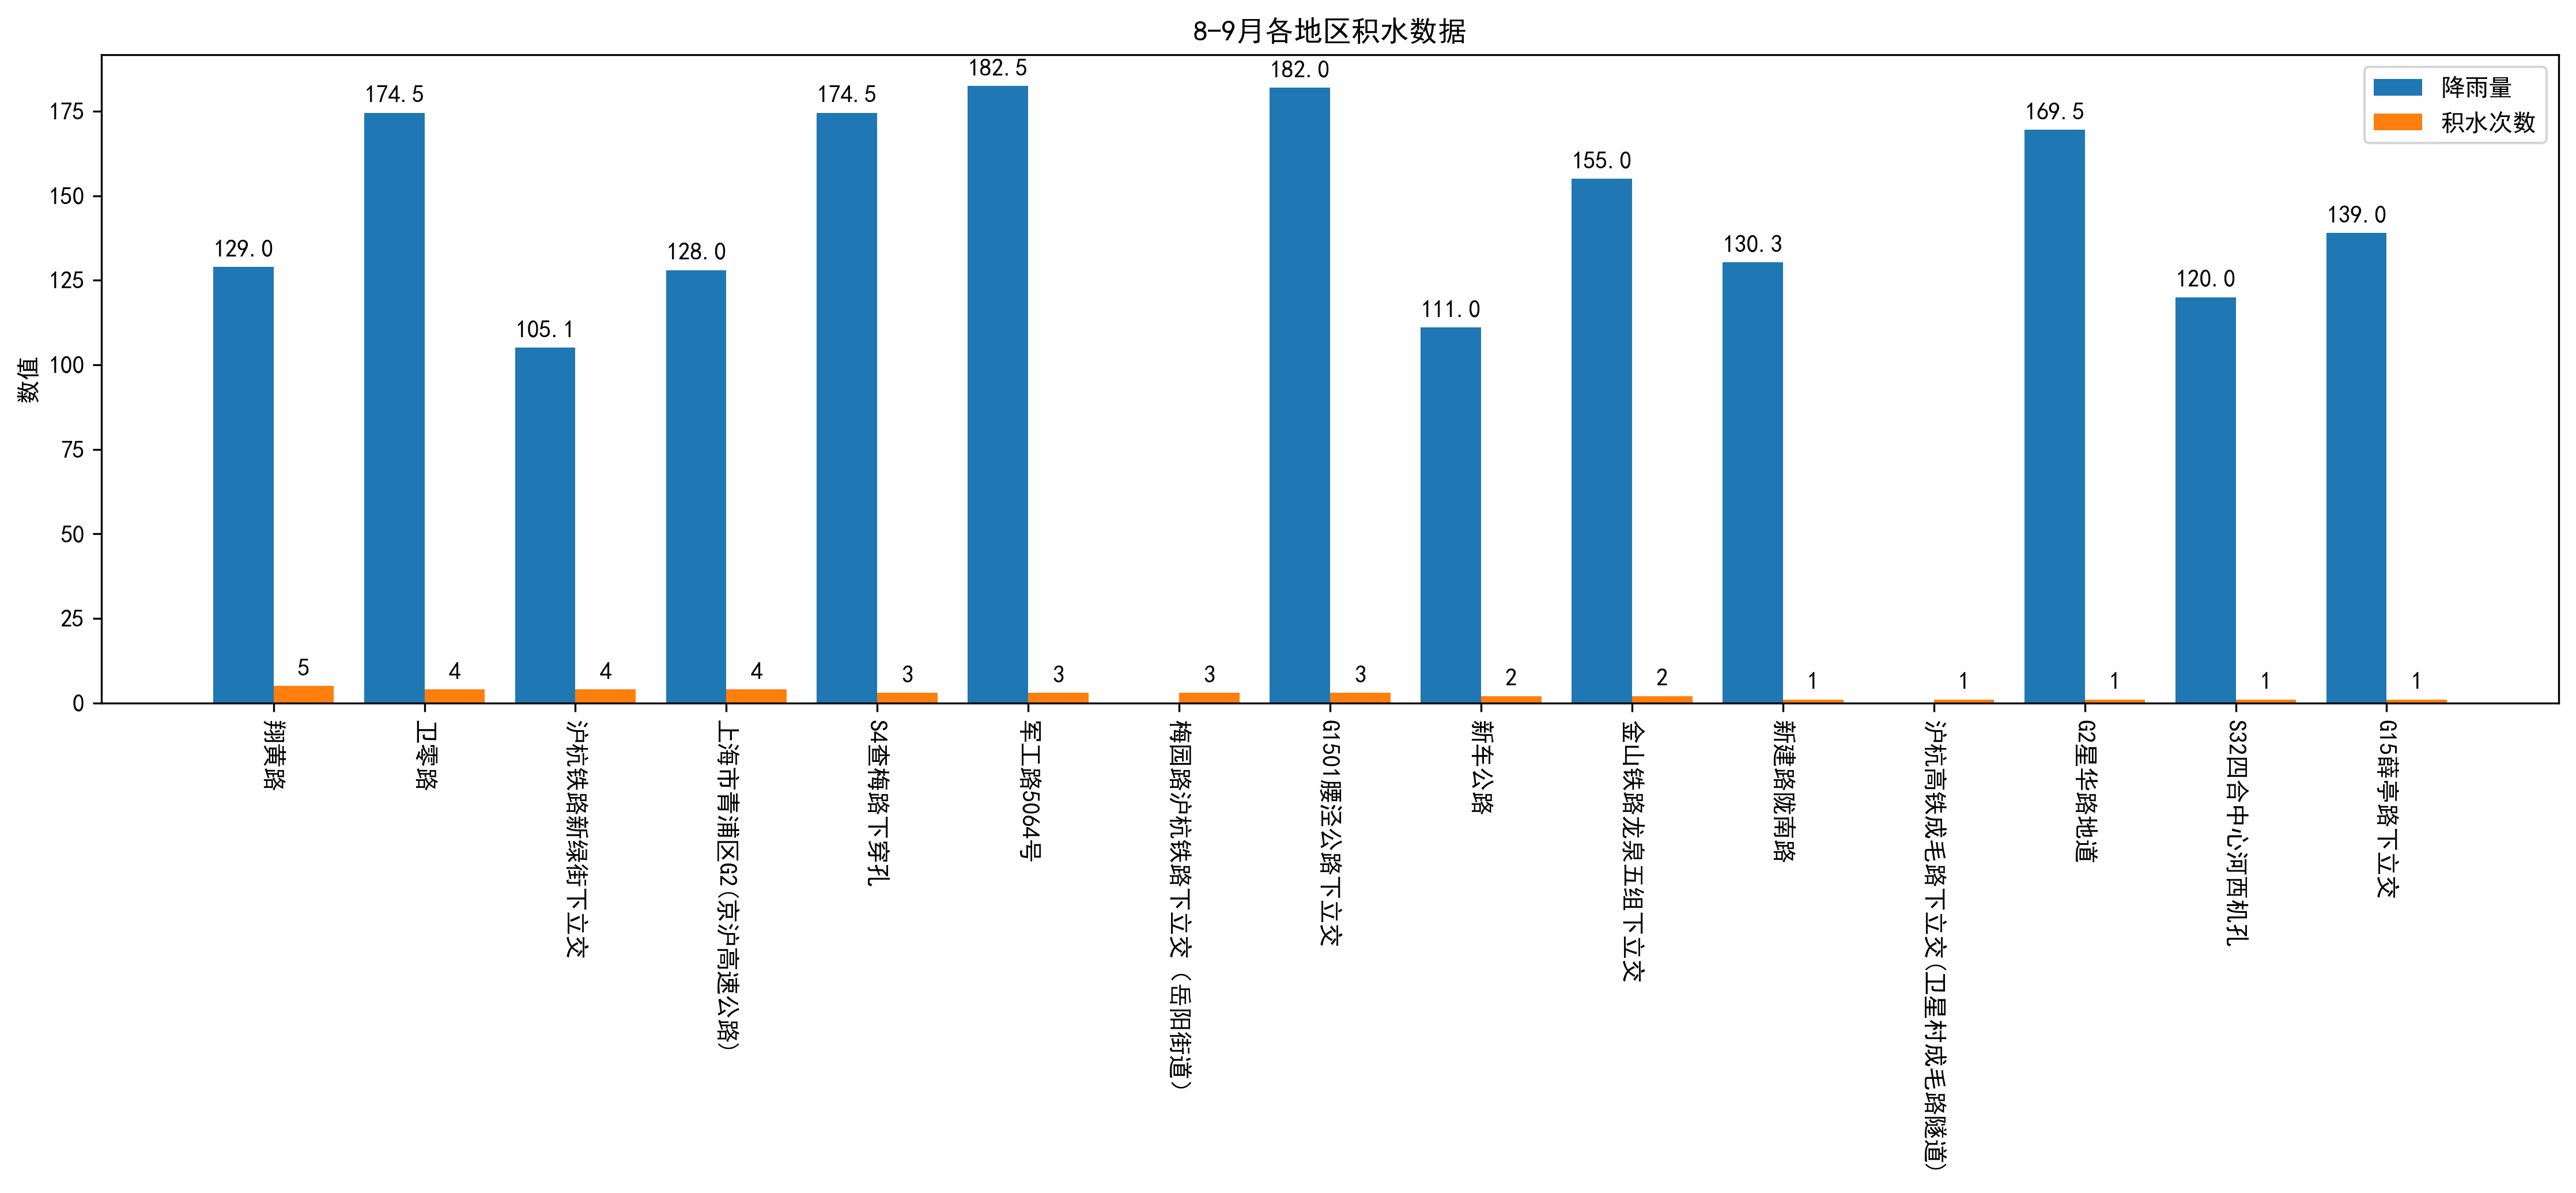

In [59]:
labels = list(draw_data['S_ADDR'])
RAINFALL = draw_data['RAINFALL']
FREQU = draw_data['FREQU'].astype(int)

x = np.arange(len(labels))
width = 0.4
fig, ax = plt.subplots(figsize=(15,7))
rects1 = ax.bar(x - 0.2, RAINFALL, width, label='降雨量')
rects2 = ax.bar(x + 0.2, FREQU, width, label='积水次数')

ax.set_ylabel('数值')
ax.set_title('8-9月各地区积水数据')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=-90)
ax.legend()

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.savefig('E:/PyProject/OverpassWater/data/降雨图.png')
plt.show()